In [1]:
## imports

import sys
import os
import numpy as np
import xarray as xr
import cmocean
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import gridspec
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cftime
import nc_time_axis

import mtspec

# from pylab import *

import datetime
import time
import glob, os
import math
import matplotlib.colors as colors

%load_ext autoreload
%autoreload 2

In [5]:
from defs import TP_variability 

In [2]:
figwidth1 = 8.3;
figwidth2 = 12;
labelfontsize = 13;
legendfontsize = 12;
titlefontsize = 13;

In [3]:
modellist = ['CCSM4', 'CCSM4-UoT', 'CCSM4-Utr', 'CESM1.2', 'CESM2', 'COSMOS', 'EC-Earth3.3',
             'GISS2.1G', 'HadCM3', 'HadGEM3', 'IPSLCM5A', 'IPSLCM5A2', 'IPSLCM6A', 'MIROC4m', 
             'MRI2.3', 'NorESM-L', 'NorESM1-F']


In [14]:
for i in range(len(modellist)):
    
    model = modellist[i]
    a = TP_variability(model, run = 'E280', latbound = 23)
    b = TP_variability(model, run = 'EOI400', latbound = 23)

    # save for mean EOF
    if i==0: 
        TPsd_e280   = a.where(a>0, other=0)
        TPsd_eoi400 = b.where(b>0, other=0)
        TP_e280_mask   = np.isnan(a)*1;
        TP_eoi400_mask = np.isnan(b)*1;
    else:
        TPsd_e280   = TPsd_e280 + a.where(a>0, other=0).values           
        TPsd_eoi400 = TPsd_eoi400 + b.where(b>0, other=0)
        TP_e280_mask   = TP_e280_mask + (np.isnan(a)*1).values;
        TP_eoi400_mask = TP_eoi400_mask + (np.isnan(b)*1).values;
        
           
EM_TPsd_e280   = TPsd_e280/(len(modellist) - TP_e280_mask)
EM_TPsd_eoi400 = TPsd_eoi400/(len(modellist) - TP_eoi400_mask)

/opt/anaconda3/envs/pliomip/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/envs/pliomip/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/envs/pliomip/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/envs/pliomip/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/envs/pliomip/lib/python3.8/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.dat

# **Figure 1**

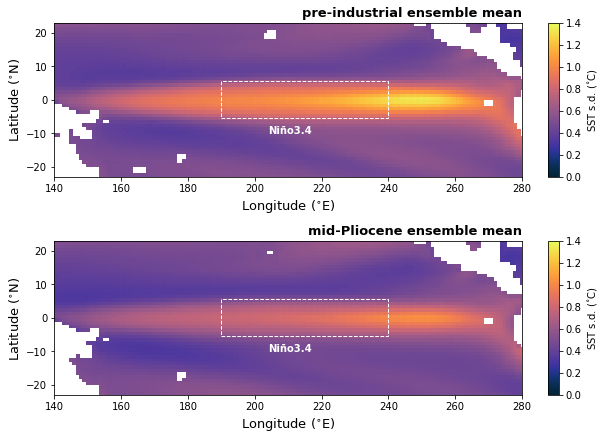

In [84]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(figwidth1, 6), constrained_layout=True)

Nmask = 3;

caption = False
textx = 124; texty = 24; 

regions = ['Niño4', 'Niño3.4', 'Niño3', 'Niño1+2']
cols = ['c', 'w', 'b', 'k']
minlats = [-5, -5.5, -5, -10]
maxlats = [5, 5.5, 5, 0]
minlons = [160, 190, 210.5, 269.5]
maxlons = [209.5, 240, 270.5, 280]
xlocs = [163, 204, 257, 262]
ylocs = [6, -10, 6, -14]

lats = [-23, 23]
lons = [140, 280]

vmin = 0; vmax = 1.4; cmap = plt.get_cmap('cmo.thermal')#, vmax-vmin)

a = EM_TPsd_e280
b = EM_TPsd_eoi400

ax=axs[0]
mask1 = 1 + 0*TP_e280_mask.where(TP_e280_mask<Nmask)
(a*mask1).plot(ax=ax, vmin=vmin, vmax=vmax, cmap=cmap, cbar_kwargs = dict(label='SST s.d. ($^{\circ}$C)', ))
# ax.set_title('E280 ensemble mean', loc='right', fontsize=titlefontsize, fontweight = 'bold')
ax.set_title('pre-industrial ensemble mean', loc='right', fontsize=titlefontsize, fontweight = 'bold')
# 
ax.set_xlim(lons[0], lons[1]); ax.set_ylim(lats[0], lats[1]);
ax.set_xlabel('Longitude ($^{\circ}$E)', fontsize=labelfontsize)
ax.set_ylabel('Latitude ($^{\circ}$N)', fontsize=labelfontsize)
ax.set_title('')
if caption == True: ax.text(textx, texty, '(a)', fontsize = 17, fontweight = 'bold')   
    
# for i in range(len(regions)):    
#     ax.add_patch(Rectangle((minlons[i], minlats[i]), (maxlons[i]- minlons[i]), abs(maxlats[i] - minlats[i]), 
#                        fill=False, linestyle='--', color=cols[i])); 
#     ax.text(xlocs[i], ylocs[i], regions[i], fontsize=10, fontweight='bold', color = cols[i])
    
i=1    
ax.add_patch(Rectangle((minlons[i], minlats[i]), (maxlons[i]- minlons[i]), abs(maxlats[i] - minlats[i]), 
                       fill=False, linestyle='--', color=cols[i])); 
ax.text(xlocs[i], ylocs[i], regions[i], fontsize=10, fontweight='bold', color = cols[i])
    
ax=axs[1]
mask2 = 1 + 0*TP_eoi400_mask.where(TP_eoi400_mask<Nmask)
(b*mask2).plot(ax=ax, vmin=vmin, vmax=vmax, cmap=cmap,  cbar_kwargs = dict(label='SST s.d. ($^{\circ}$C)'))
# ax.set_title('Eoi400 ensemble mean', loc='right', fontsize=titlefontsize, fontweight = 'bold')
ax.set_title('mid-Pliocene ensemble mean', loc='right', fontsize=titlefontsize, fontweight = 'bold')

# ax.set_title(r'$\bigcirc$: HadISST', loc='left', fontsize=titlefontsize, fontweight = 'bold')
ax.set_xlim(lons[0], lons[1]); ax.set_ylim(lats[0], lats[1]);
ax.set_xlabel('Longitude ($^{\circ}$E)', fontsize=labelfontsize)
ax.set_ylabel('Latitude ($^{\circ}$N)', fontsize=labelfontsize)
ax.set_title('')
if caption == True: ax.text(textx, texty, '(b)', fontsize = 17, fontweight = 'bold')

# for i in range(len(regions)):    
#     ax.add_patch(Rectangle((minlons[i], minlats[i]), (maxlons[i]- minlons[i]), abs(maxlats[i] - minlats[i]), 
#                        fill=False, linestyle='--', color=cols[i])); 
#     ax.text(xlocs[i], ylocs[i], regions[i], fontsize=10, fontweight='bold', color = cols[i])
    
i=1    
ax.add_patch(Rectangle((minlons[i], minlats[i]), (maxlons[i]- minlons[i]), abs(maxlats[i] - minlats[i]), 
                       fill=False, linestyle='--', color=cols[i])); 
ax.text(xlocs[i], ylocs[i], regions[i], fontsize=10, fontweight='bold', color = cols[i])

# plt.savefig('figures/figure1_new.pdf', bbox_inches='tight')
plt.savefig('figures/figure1_NAC.png',dpi=500)

# plt.savefig('figures/figure1_new.jpg', bbox_inches='tight', dpi=150)